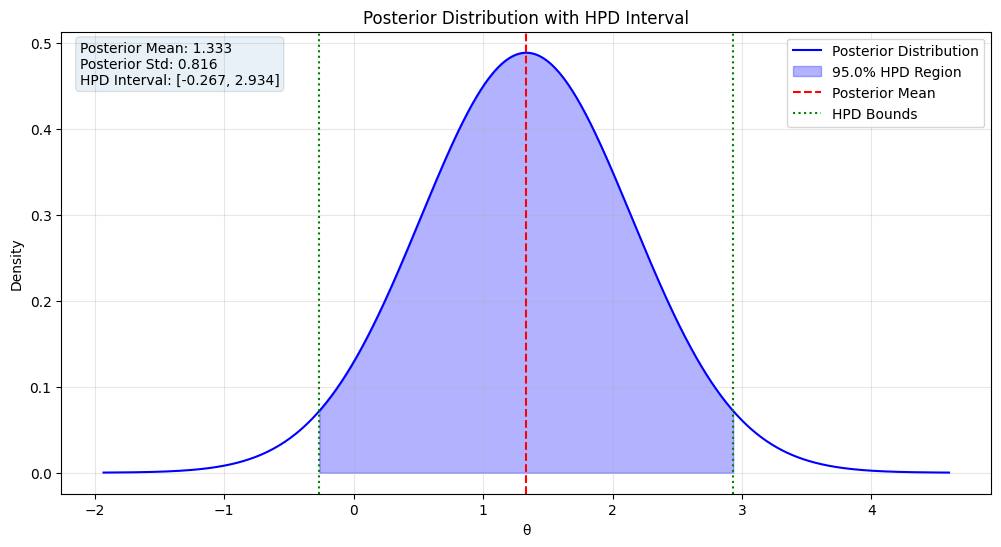

HPD interval calculation demonstration:
95% HPD interval: [-0.267, 2.934]


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def calculate_posterior_params(x, theta_0, phi, phi_0):
    """Calculate posterior mean and standard deviation"""
    precision_sum = 1/phi + 1/phi_0
    posterior_mean = (x/phi + theta_0/phi_0) / precision_sum
    posterior_std = np.sqrt(1/precision_sum)
    return posterior_mean, posterior_std

def calculate_hpd_interval(posterior_mean, posterior_std, alpha=0.05):
    """Calculate the HPD interval for normal distribution"""
    z_value = norm.ppf(1 - alpha/2)
    lower = posterior_mean - z_value * posterior_std
    upper = posterior_mean + z_value * posterior_std
    return lower, upper

def plot_posterior_hpd(x, theta_0, phi, phi_0, alpha=0.05):
    """Plot posterior distribution with HPD interval"""
    # Calculate posterior parameters
    posterior_mean, posterior_std = calculate_posterior_params(x, theta_0, phi, phi_0)
    lower_hpd, upper_hpd = calculate_hpd_interval(posterior_mean, posterior_std, alpha)
    
    # Create range for plotting
    theta_range = np.linspace(posterior_mean - 4*posterior_std,
                            posterior_mean + 4*posterior_std, 1000)
    posterior = norm.pdf(theta_range, posterior_mean, posterior_std)
    
    # Create plot
    plt.figure(figsize=(12, 6))
    plt.plot(theta_range, posterior, 'b-', label='Posterior Distribution')
    
    # Shade HPD region
    hpd_region = np.logical_and(theta_range >= lower_hpd, theta_range <= upper_hpd)
    plt.fill_between(theta_range[hpd_region], posterior[hpd_region], 
                     alpha=0.3, color='blue', label=f'{100*(1-alpha)}% HPD Region')
    
    # Add vertical lines
    plt.axvline(x=posterior_mean, color='r', linestyle='--', 
                label='Posterior Mean')
    plt.axvline(x=lower_hpd, color='g', linestyle=':', label='HPD Bounds')
    plt.axvline(x=upper_hpd, color='g', linestyle=':')
    
    # Add annotations
    plt.title('Posterior Distribution with HPD Interval')
    plt.xlabel('θ')
    plt.ylabel('Density')
    
    # Add text box with calculations
    textstr = f'Posterior Mean: {posterior_mean:.3f}\n'
    textstr += f'Posterior Std: {posterior_std:.3f}\n'
    textstr += f'HPD Interval: [{lower_hpd:.3f}, {upper_hpd:.3f}]'
    plt.text(0.02, 0.98, textstr, transform=plt.gca().transAxes,
             verticalalignment='top', bbox=dict(boxstyle='round', alpha=0.1))
    
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

# Example usage
x = 2.0          # observed value
theta_0 = 0.0    # prior mean
phi = 1.0        # likelihood variance
phi_0 = 2.0      # prior variance
alpha = 0.05     # for 95% HPD interval

plot_posterior_hpd(x, theta_0, phi, phi_0, alpha)
print("HPD interval calculation demonstration:")
posterior_mean, posterior_std = calculate_posterior_params(x, theta_0, phi, phi_0)
lower, upper = calculate_hpd_interval(posterior_mean, posterior_std)
print(f"95% HPD interval: [{lower:.3f}, {upper:.3f}]")

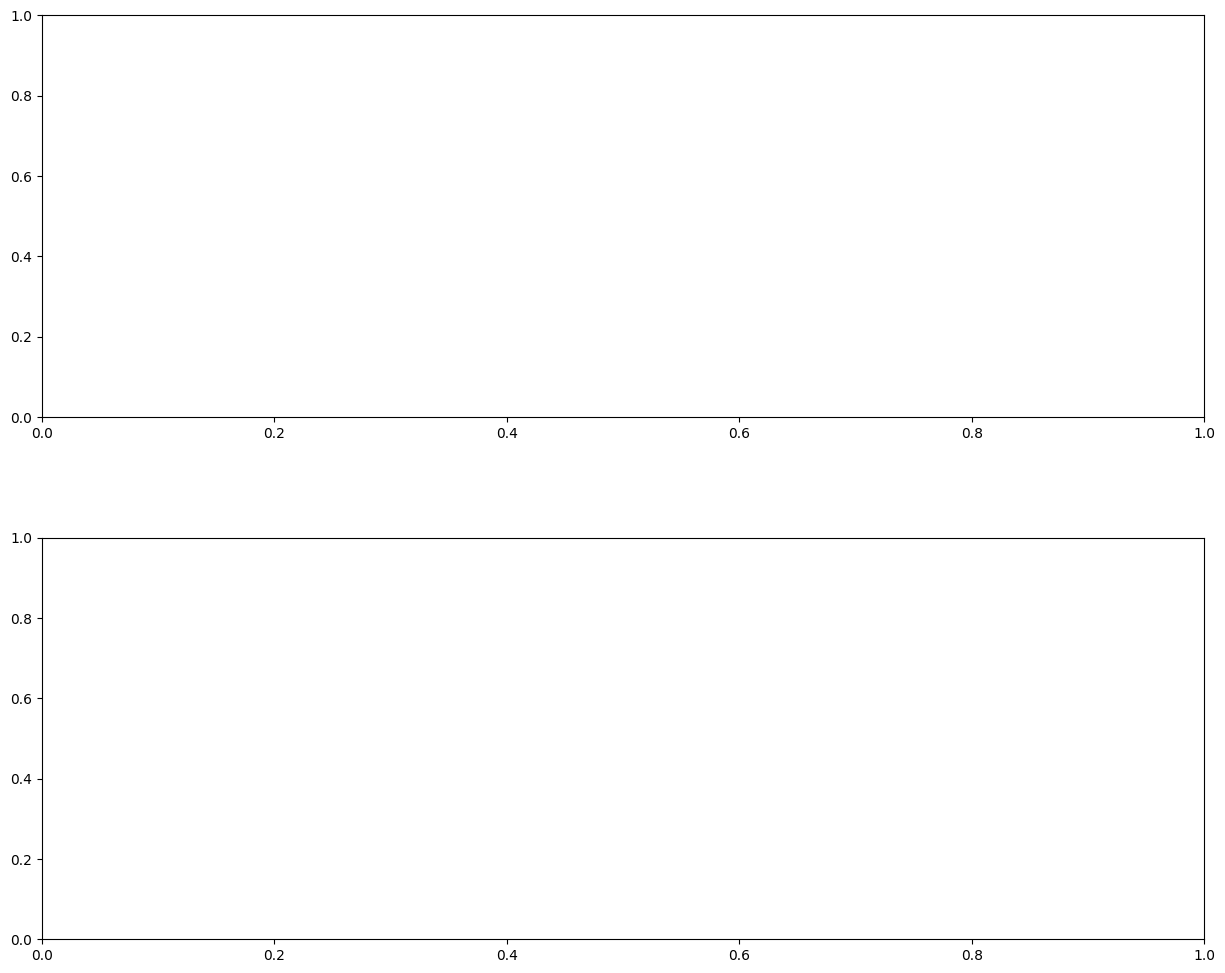

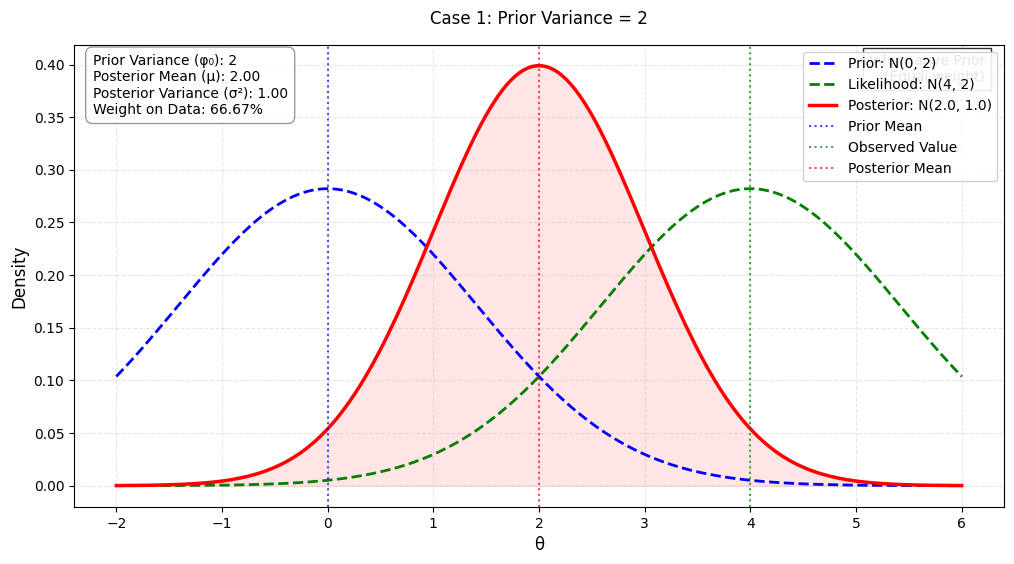

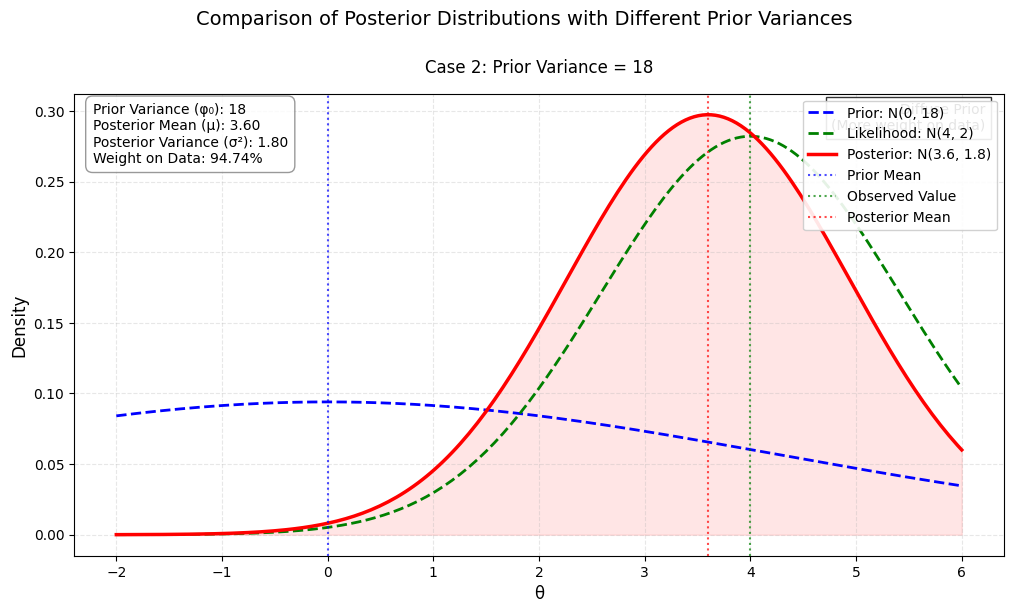

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from matplotlib.patches import Rectangle

def calculate_posterior_params(x, theta_0, phi, phi_0):
    """
    Calculate posterior distribution parameters given prior and likelihood parameters.
    
    Args:
        x (float): Observed value
        theta_0 (float): Prior mean
        phi (float): Likelihood variance
        phi_0 (float): Prior variance
    
    Returns:
        tuple: (posterior_mean, posterior_variance)
    """
    precision_sum = 1/phi + 1/phi_0
    posterior_mean = (x/phi + theta_0/phi_0) / precision_sum
    posterior_var = 1/precision_sum
    return posterior_mean, posterior_var

def create_distribution_plot(theta_range, prior, likelihood, posterior, 
                           theta_0, x, posterior_mean, phi_0, posterior_var,
                           title):
    """
    Create a single distribution plot with enhanced styling and annotations.
    
    Args:
        theta_range (array): Range of theta values for plotting
        prior, likelihood, posterior (array): Distribution values
        theta_0, x, posterior_mean (float): Key points for vertical lines
        phi_0, posterior_var (float): Variance values for annotations
        title (str): Plot title
    """
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Plot distributions with enhanced styling
    ax.plot(theta_range, prior, 'b--', label=f'Prior: N(0, {phi_0})', linewidth=2)
    ax.plot(theta_range, likelihood, 'g--', label=f'Likelihood: N({x}, 2)', linewidth=2)
    ax.plot(theta_range, posterior, 'r-', 
            label=f'Posterior: N({posterior_mean:.1f}, {posterior_var:.1f})', 
            linewidth=2.5)
    
    # Add vertical lines with enhanced styling
    for value, color, label in [(theta_0, 'blue', 'Prior Mean'),
                               (x, 'green', 'Observed Value'),
                               (posterior_mean, 'red', 'Posterior Mean')]:
        ax.axvline(x=value, color=color, linestyle=':', label=label, 
                  alpha=0.7, linewidth=1.5)
    
    # Add shaded regions to highlight key areas
    max_density = max(max(prior), max(likelihood), max(posterior))
    ax.fill_between(theta_range, 0, posterior, alpha=0.1, color='red')
    
    # Enhance grid and styling
    ax.grid(True, linestyle='--', alpha=0.3)
    ax.set_title(title, fontsize=12, pad=15)
    ax.set_xlabel('θ', fontsize=12)
    ax.set_ylabel('Density', fontsize=12)
    
    # Add detailed statistics box with enhanced styling
    stats_text = (
        f'Prior Variance (φ₀): {phi_0}\n'
        f'Posterior Mean (μ): {posterior_mean:.2f}\n'
        f'Posterior Variance (σ²): {posterior_var:.2f}\n'
        f'Weight on Data: {(1/phi)/(1/phi + 1/phi_0):.2%}'
    )
    
    # Create fancy box for statistics
    bbox_props = dict(boxstyle='round,pad=0.5', facecolor='white', 
                     alpha=0.8, edgecolor='gray')
    ax.text(0.02, 0.98, stats_text, transform=ax.transAxes,
            verticalalignment='top', fontsize=10,
            bbox=bbox_props)
    
    # Enhance legend
    ax.legend(loc='upper right', framealpha=0.9, fontsize=10)
    
    return fig, ax

def plot_comparative_analysis(phi, theta_0, phi_0_values, x):
    """
    Create comparative plots for different prior variances.
    
    Args:
        phi (float): Likelihood variance
        theta_0 (float): Prior mean
        phi_0_values (list): List of prior variances to compare
        x (float): Observed value
    """
    theta_range = np.linspace(-2, 6, 200)
    
    # Create subplot for each case
    fig, axes = plt.subplots(len(phi_0_values), 1, 
                            figsize=(15, 6*len(phi_0_values)))
    plt.subplots_adjust(hspace=0.3)
    
    for i, phi_0 in enumerate(phi_0_values):
        # Calculate distributions
        posterior_mean, posterior_var = calculate_posterior_params(x, theta_0, 
                                                                phi, phi_0)
        prior = norm.pdf(theta_range, theta_0, np.sqrt(phi_0))
        likelihood = norm.pdf(theta_range, x, np.sqrt(phi))
        posterior = norm.pdf(theta_range, posterior_mean, np.sqrt(posterior_var))
        
        # Create enhanced plot
        title = f'Case {i+1}: Prior Variance = {phi_0}'
        if len(phi_0_values) == 1:
            ax = axes
        else:
            ax = axes[i]
        
        _, ax = create_distribution_plot(theta_range, prior, likelihood, posterior,
                                       theta_0, x, posterior_mean, phi_0, 
                                       posterior_var, title)
        
        # Add case-specific annotations
        if phi_0 == 2:
            ax.text(0.98, 0.98, 'Informative Prior\n(Equal weight)', 
                   transform=ax.transAxes, ha='right', va='top',
                   bbox=dict(facecolor='white', alpha=0.8))
        elif phi_0 == 18:
            ax.text(0.98, 0.98, 'Diffuse Prior\n(More weight on data)', 
                   transform=ax.transAxes, ha='right', va='top',
                   bbox=dict(facecolor='white', alpha=0.8))
    
    plt.suptitle('Comparison of Posterior Distributions with Different Prior Variances',
                fontsize=14, y=1.02)
    return fig

# Generate the comparative analysis
analysis_plot = plot_comparative_analysis(phi=2, theta_0=0, 
                                        phi_0_values=[2, 18], x=4)
plt.show()